### Import tools

In [1]:
import pandas as pd 
import numpy as np
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nrclex import NRCLex


dataset = pd.read_csv("TaylorSwift.csv")

dataset.head(5)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biabc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Unnamed: 0        Artist                     Title       Album    Year   
0           0  Taylor Swift                 ​cardigan    folklore  2020.0  \
1           1  Taylor Swift                    ​exile    folklore  2020.0   
2           2  Taylor Swift                     Lover       Lover  2019.0   
3           3  Taylor Swift                    ​the 1    folklore  2020.0   
4           4  Taylor Swift  Look What You Made Me Do  reputation  2017.0   

         Date                                              Lyric  
0  2020-07-24  vintage tee brand new phone high heels on cobb...  
1  2020-07-24  justin vernon i can see you standing honey wit...  
2  2019-08-16  we could leave the christmas lights up 'til ja...  
3  2020-07-24  i'm doing good i'm on some new shit been sayin...  
4  2017-08-25  i don't like your little games don't like your...

### Cleaning data

In [21]:
taylor_vers = [ i for i in dataset['Album'] if i in ("Speak Now(Taylor's Version)", "Red (Taylor's Version)", "Fearless")]
taylor_vers

#Checking if there's any taylor's vesion album, because that would mean repeated songs

['Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless',
 'Fearless']

In [2]:
dataset = dataset.dropna(subset=['Lyric'])

#Removing the rows where the lyrics are missing because the 'Lyric' column will be our main parameter for the analysis

#### Preparing for tokenazation 

In [3]:
stop_words = set(stopwords.words('english'))

lyrics = [i for i in dataset['Lyric']] # putting lyrics in a list



tokenized_lyrics = []

for i in lyrics: # tokenization
    tokenized_lyrics.append(word_tokenize(i)) # tokenizing every word from every lyric



filtered_lyrics = []

for i in tokenized_lyrics: # removing stop words
    col = []
    for j in i: 
        if j.lower() not in stop_words and j.isalnum():
            col.append(j.lower())
        
        filtered_lyrics.append(col)

filtered_lyrics



[['vintage',
  'tee',
  'brand',
  'new',
  'phone',
  'high',
  'heels',
  'cobblestones',
  'young',
  'assume',
  'know',
  'nothing',
  'sequin',
  'smile',
  'black',
  'lipstick',
  'sensual',
  'politics',
  'young',
  'assume',
  'know',
  'nothing',
  'knew',
  'dancin',
  'levi',
  'drunk',
  'streetlight',
  'knew',
  'hand',
  'sweatshirt',
  'baby',
  'kiss',
  'better',
  'refrain',
  'felt',
  'like',
  'old',
  'cardigan',
  'someone',
  'bed',
  'put',
  'said',
  'favorite',
  'friend',
  'friend',
  'none',
  'chase',
  'two',
  'girls',
  'lose',
  'one',
  'young',
  'assume',
  'know',
  'nothing',
  'knew',
  'playing',
  'hideandseek',
  'giving',
  'weekends',
  'knew',
  'heartbeat',
  'high',
  'line',
  'twenty',
  'lifetimes',
  'refrain',
  'felt',
  'like',
  'old',
  'cardigan',
  'someone',
  'bed',
  'put',
  'said',
  'favorite',
  'kiss',
  'cars',
  'downtown',
  'bars',
  'needed',
  'drew',
  'stars',
  'around',
  'scars',
  'bleedin',
  'knew',


In [8]:
# Now, let's do the average of emotions in each song
# Because we're using NRClex, for now we will use the non-filtered version of the lyrics
from collections import Counter

emotions = []

for i in lyrics:  # Here we give the song the average emotion in it
    
    e = NRCLex(i)
    if e.affect_list:  # Verifica se a lista não está vazia
        mode = max(e.affect_list, key=Counter(e.affect_list).get)
        emotions.append(mode)
    else:
        ind = dataset.loc[dataset['Lyric'] == i].index
        dataset = dataset.drop(ind) # remove songs wich do not contain valid lyrics
    
dataset['Emotion'] = emotions




In [11]:
# Here we can se the emotions for the first 5 songs in the dataset

dataset.head(5)

dataset['Emotion'].mode()

0    positive
Name: Emotion, dtype: object

- From that we can assume that most of Taylor Swift's songs are related to positive fellings, Love songs.

### Exploring our data

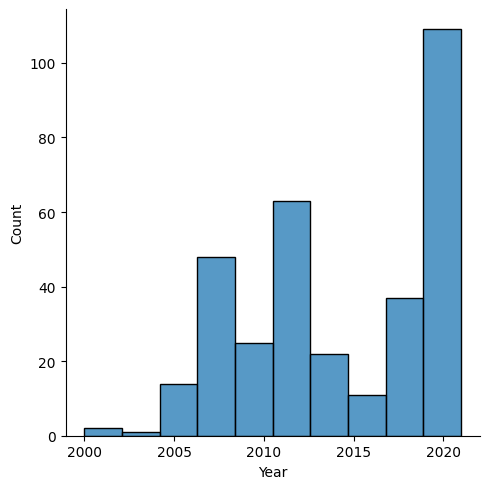

In [13]:
sns.displot(data=dataset, x ='Year', bins = 10)

# Most of the songs where released in 2010-2020, when taylor swift was ascending in the industry